In [3]:
# Import Data
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [4]:
# IMPORT AND INTEGRATE DATA
# 1- Demographic Data
demo = pd.read_csv(r'crm.csv')
demo

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
0,14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0
1,19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0
2,29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0
3,12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1
4,21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0
...,...,...,...,...,...,...,...,...
6995,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0
6996,17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0
6997,29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1
6998,23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0


In [5]:
# 2- Firmographic Data
firmo = pd.read_excel(r'sales.xlsx')
firmo

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


In [6]:
# 3- Marketing Data
mkt = pd.read_csv(r'mkt.csv')
mkt

,CustomerID,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
0,31958,0,0,0,0,0
1,5387,0,0,0,0,0
2,32006,0,0,0,0,0
3,7511,0,0,0,0,0
4,12308,0,0,0,0,0
...,...,...,...,...,...,...
7018,22358,0,0,0,0,0
7019,29516,0,0,0,0,0
7020,18890,0,0,0,0,0
7021,30206,0,0,0,0,0


In [7]:
# Merge the data from the three previous files and store it in the object df ("inner join" by default)
df = pd.merge(pd.merge(demo,firmo,on ='CustomerID'),mkt,on='CustomerID')
df

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,...,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
0,14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,2021-01-09 00:00:00,43.0,...,10,7,7,4,0,0,1,0,0,0
1,19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0,2021-04-10 00:00:00,74.0,...,5,9,12,2,0,0,0,0,0,0
2,29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0,2022-01-12 00:00:00,85.0,...,5,5,7,1,0,0,0,0,0,0
3,12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1,2021-10-12 00:00:00,25.0,...,8,3,8,5,0,0,0,0,0,0
4,21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0,2020-12-11 00:00:00,64.0,...,4,7,8,5,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0,2021-12-08 00:00:00,66.0,...,6,6,11,2,0,0,0,0,0,0
7027,17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0,2020-09-12 00:00:00,8.0,...,5,7,7,2,0,0,0,0,0,0
7028,29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1,2021-12-15 00:00:00,30.0,...,3,1,4,6,0,0,0,0,0,0
7029,23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0,2020-11-12 00:00:00,8.0,...,3,1,3,8,0,0,0,0,0,0


In [8]:
# Set index
df.set_index('CustomerID', inplace = True)
df

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,2021-01-09 00:00:00,43.0,4640.0,...,10,7,7,4,0,0,1,0,0,0
19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0,2021-04-10 00:00:00,74.0,7080.0,...,5,9,12,2,0,0,0,0,0,0
29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0,2022-01-12 00:00:00,85.0,4130.0,...,5,5,7,1,0,0,0,0,0,0
12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1,2021-10-12 00:00:00,25.0,3590.0,...,8,3,8,5,0,0,0,0,0,0
21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0,2020-12-11 00:00:00,64.0,5390.0,...,4,7,8,5,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0,2021-12-08 00:00:00,66.0,9090.0,...,6,6,11,2,0,0,0,0,0,0
17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0,2020-09-12 00:00:00,8.0,5870.0,...,5,7,7,2,0,0,0,0,0,0
29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1,2021-12-15 00:00:00,30.0,540.0,...,3,1,4,6,0,0,0,0,0,0


In [9]:
# Check for duplicates
df[df.duplicated()]

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,
32924,Mrs. Wanda Terry,1986,Graduation,Divorced,41264.0,1,1,2020-10-03 00:00:00,61.0,70.0,...,3,1,3,7,0,0,0,0,0,0
8276,Mrs. Mary Jackson,1968,HighSchool,Married,118238.0,0,0,2020-10-13 00:00:00,42.0,5940.0,...,6,7,8,2,0,0,0,0,0,0
32966,Mr. Steven Baker,1961,HighSchool,Married,84974.0,0,1,2022-02-17 00:00:00,56.0,2610.0,...,6,5,9,3,0,0,0,0,0,0
5627,Mr. Jonathan Clark,1988,Graduation,Married,40975.0,1,0,2022-04-28 00:00:00,31.0,130.0,...,3,1,4,3,0,0,0,0,0,0
29357,Mr. Eric Springer,1972,PhD,Married,77778.0,0,1,2022-04-19 00:00:00,92.0,1240.0,...,5,2,4,6,0,0,1,0,0,0
26891,Mr. Sam Peake,1992,Graduation,Married,74147.0,1,0,2022-03-21 00:00:00,13.0,610.0,...,6,3,2,6,0,1,0,0,0,0
21269,Mr. Nathan Glover,1971,Graduation,Married,91241.0,0,1,2022-03-28 00:00:00,18.0,1780.0,...,8,3,6,5,0,0,0,0,0,0
32777,Mr. Joe James,1967,Master,Married,101251.0,0,1,2021-12-30 00:00:00,26.0,7350.0,...,8,8,6,3,0,1,0,0,0,0
26285,Mr. Oliver Sanderson,1986,Basic,Together,22345.0,1,0,2021-03-21 00:00:00,54.0,50.0,...,5,2,2,9,0,1,0,0,0,0


In [10]:
# Drop any duplicate rows present in the dataframe
df.drop_duplicates(inplace = True)
df

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,...,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,2021-01-09 00:00:00,43.0,4640.0,...,10,7,7,4,0,0,1,0,0,0
19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0,2021-04-10 00:00:00,74.0,7080.0,...,5,9,12,2,0,0,0,0,0,0
29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0,2022-01-12 00:00:00,85.0,4130.0,...,5,5,7,1,0,0,0,0,0,0
12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1,2021-10-12 00:00:00,25.0,3590.0,...,8,3,8,5,0,0,0,0,0,0
21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0,2020-12-11 00:00:00,64.0,5390.0,...,4,7,8,5,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0,2021-12-08 00:00:00,66.0,9090.0,...,6,6,11,2,0,0,0,0,0,0
17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0,2020-09-12 00:00:00,8.0,5870.0,...,5,7,7,2,0,0,0,0,0,0
29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1,2021-12-15 00:00:00,30.0,540.0,...,3,1,4,6,0,0,0,0,0,0


In [11]:
# EXPLORE DATA
# Basic Exploration
df.shape
# Our dataset contains 7000 rows and 26 columns

(7000, 26)

In [12]:
# some information of the dataset
df.info()
# We can verify that we are working with:
# 7 float variables
# 15 integer variables
# 4 object variables
# We can also check that some of tha variables have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

In [13]:
# Numerical Variables
df.describe()
# count - We have a problem of missing values in Recency and MntDrinks variables

,Birthyear,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,...,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
count,7000.000000,7000.000000,7000.000000,7000.000000,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,49.235058,3079.523800,534.749429,2785.050786,545.657544,540.656029,...,6.015714,3.834571,5.790571,5.278286,0.010286,0.079143,0.073286,0.083000,0.065857,0.014286
std,11.996270,35409.810253,0.543477,0.542174,28.922688,3370.377166,787.846684,3908.718244,805.149088,802.221866,...,2.745537,3.331142,3.295708,2.748596,0.100903,0.269981,0.260624,0.275902,0.248050,0.118675
min,1948.000000,2493.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,51586.250000,0.000000,0.000000,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,...,4.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1977.000000,77190.000000,0.000000,0.000000,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,...,6.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1985.000000,102016.250000,1.000000,1.000000,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,...,8.000000,5.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2005.000000,237639.725000,2.000000,2.000000,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,...,13.000000,24.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# skewness - measure of asymetry of a distribution
df.skew()
# Concerning the variables' skewness, we can conclude the following:
# Moderate skewness (between |0.5| and |1.0|): Income, Kid_Younger6, NumAppPurchases, NumStorePurchases
# High skewness (higher than |1.0|): MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5
# Fairly symmetrical (lower than |0.5|): Birthyear, Children_6to18, Recency

C:\Users\Sofia Ribeiro\AppData\Local\Temp\ipykernel_16972\1737566941.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
dtype: float64

In [15]:
# kurtosis - measure of the tailedness of a distribution
df.kurt()
# High kurtosis in a data set is an indicator that data has heavy tails or outliers.
# A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers.
# kurtosis > 3: MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5

C:\Users\Sofia Ribeiro\AppData\Local\Temp\ipykernel_16972\87368624.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
dtype: float64

In [16]:
# Check the spearman correlation between numerical variables
df_corr = df.corr(method = 'spearman')
df_corr

,Birthyear,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,...,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
Birthyear,1.000000,-0.214029,0.271270,-0.372970,0.004133,-0.226428,-0.010436,-0.126040,-0.015150,-0.028900,...,-0.138398,-0.154649,-0.181593,0.131218,0.010649,0.029230,-0.055897,-0.021052,-0.026908,-0.028436
Income,-0.214029,1.000000,-0.548932,0.020560,0.022986,0.795708,0.557394,0.803876,0.555133,0.559123,...,0.529657,0.764791,0.688923,-0.654587,-0.002066,-0.044141,0.214575,0.393437,0.296454,0.113801
Kid_Younger6,0.271270,-0.548932,1.000000,-0.047516,-0.008194,-0.567029,-0.422879,-0.531714,-0.426646,-0.426009,...,-0.370439,-0.560600,-0.531084,0.480143,0.015066,0.067168,-0.166316,-0.224639,-0.188593,-0.080897
Children_6to18,-0.372970,0.020560,-0.047516,1.000000,-0.005121,0.065189,-0.238802,-0.161819,-0.234649,-0.227900,...,0.113451,-0.085218,0.030509,0.126725,-0.002796,-0.039792,0.021853,-0.202535,-0.136408,0.004786
Recency,0.004133,0.022986,-0.008194,-0.005121,1.000000,0.028235,0.010656,0.026500,0.005564,0.023441,...,0.016966,0.032509,0.020803,-0.014540,0.006379,0.006075,0.002263,0.021418,0.019217,0.012459
MntMeat&Fish,-0.226428,0.795708,-0.567029,0.065189,0.028235,1.000000,0.516700,0.796560,0.515193,0.519376,...,0.736267,0.790289,0.791673,-0.364181,-0.012658,0.018900,0.288705,0.354765,0.287621,0.133005
MntEntries,-0.010436,0.557394,-0.422879,-0.238802,0.010656,0.516700,1.000000,0.692529,0.702154,0.704912,...,0.449557,0.618226,0.580253,-0.417344,0.002138,-0.030442,0.039459,0.233640,0.182756,0.019447
MntVegan&Vegetarian,-0.126040,0.803876,-0.531714,-0.161819,0.026500,0.796560,0.692529,1.000000,0.691467,0.694475,...,0.626301,0.846161,0.730503,-0.501266,-0.002453,0.004894,0.151590,0.336934,0.273699,0.069451
MntDrinks,-0.015150,0.555133,-0.426646,-0.234649,0.005564,0.515193,0.702154,0.691467,1.000000,0.692968,...,0.459249,0.615178,0.585939,-0.418121,0.000809,-0.035773,0.045641,0.223380,0.172554,-0.003399
MntDesserts,-0.028900,0.559123,-0.426009,-0.227900,0.023441,0.519376,0.704912,0.694475,0.692968,1.000000,...,0.463552,0.615293,0.592495,-0.424372,-0.003383,-0.048396,0.039795,0.251253,0.196107,-0.002595


<AxesSubplot:>

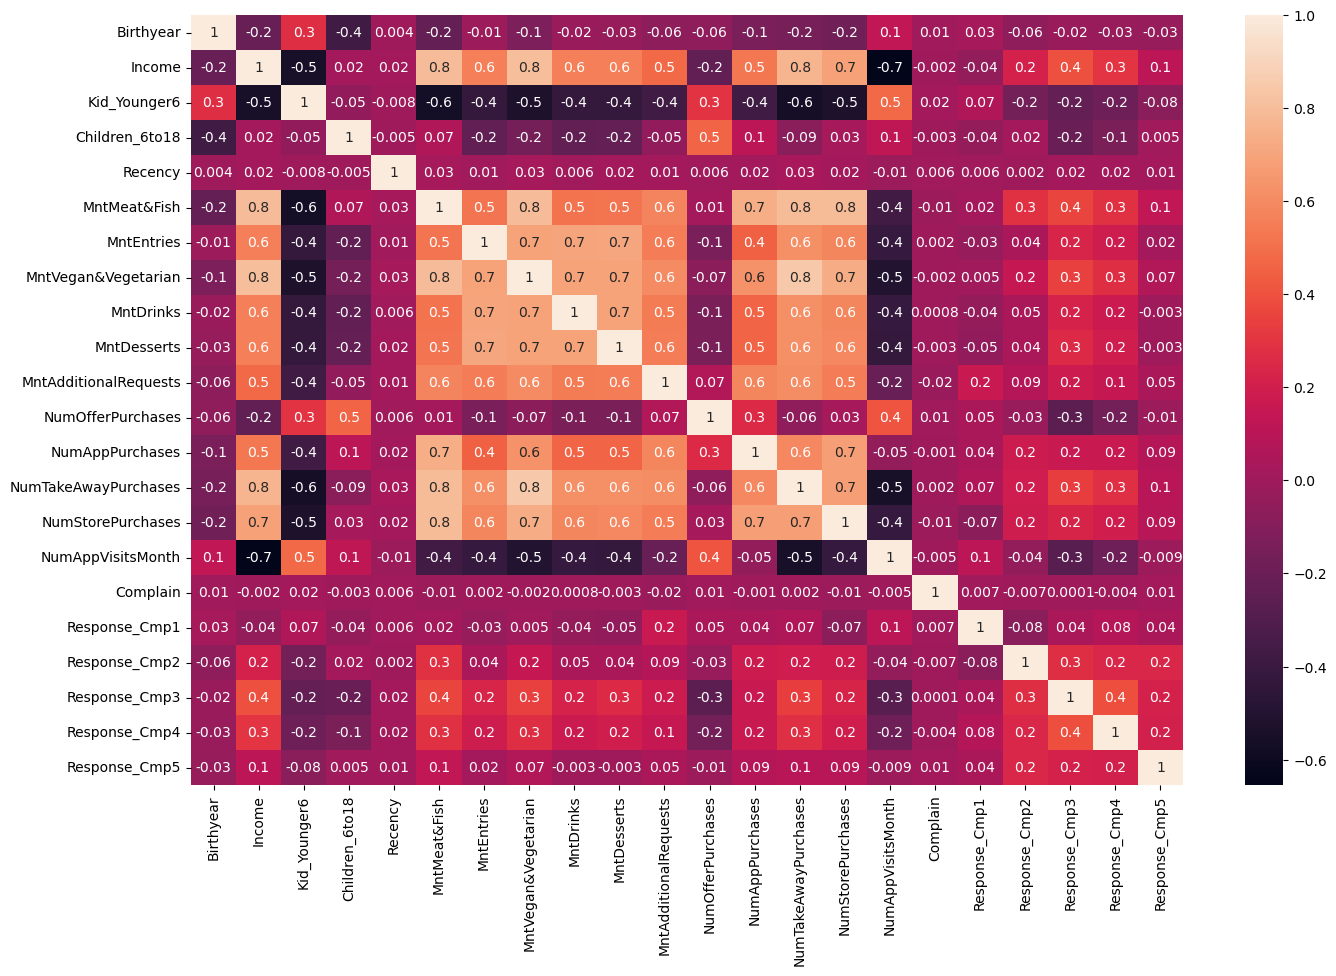

In [17]:
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [18]:
# Categorical Variables
df.describe(include = ['O'])
# We can verify some problems or issues that we need to address before applying a model:
# We have 9 possible values for Education and 10 for Marital Status: we need to check further if all those values are acceptable;
# The variable Education has only 6986 values out of 7000 filled.

,Name,Education,Marital_Status,Date_Adherence
count,7000,6986,7000,7000
unique,6241,9,10,701
top,Mr. Stewart Grant,Graduation,Married,2020-09-19 00:00:00
freq,3,3497,2830,23


In [19]:
# Check the levels/possible values in the variables "Education" and "Marital_Status"
df['Education'].value_counts()
# We have a problem in this variable:
# Master, Graduation, Phd, HighSchool are written in different ways. We need to make some transformations in this variable.

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

In [20]:
df['Education'] = df['Education'].str.capitalize() 
df['Education'].value_counts()

Graduation    3504
Phd           1496
Master        1142
Highschool     665
Basic          179
Name: Education, dtype: int64

In [21]:
df['Marital_Status'].value_counts()
# It seems that this variable needs also some transformations:
# Married, Together, Single, Divorced and Widow are written in different ways;
# Does it make sense to have Together and Married into two different levels?

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

In [22]:
df['Marital_Status'] = df['Marital_Status'].str.capitalize() 
df['Marital_Status'].value_counts()

Married     2866
Together    1706
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

In [23]:
# Due to the similarity of the classification, change the value "Together" to "Married" in Marital_Status
#df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
#df['Marital_Status'].value_counts()

In [24]:
# PREPROCESS DATA
# Data Cleaning
# Outliers
# We understood that the variables MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, due to the high kurtosis, could have potential outliers.
# In the following steps we are going to investigate further this possible situation
#fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(14,2, figsize = (10,3))
#sns.boxplot(ax = ax1, data = df, x = 'MntEntries')
#sns.boxplot(ax = ax2, data = df, x = 'MntVegan&Vegetarian')
#sns.boxplot(ax = ax3, data = df, x = 'MntDrinks')
#sns.boxplot(ax = ax4, data = df, x = 'MntDesserts')
#sns.boxplot(ax = ax5, data = df, x = 'MntAdditionalRequests')
#sns.boxplot(ax = ax6, data = df, x = 'NumOfferPurchases')
#sns.boxplot(ax = ax7, data = df, x = 'NumTakeAwayPurchases')
#sns.boxplot(ax = ax8, data = df, x = 'NumAppVisitsMonth')
#sns.boxplot(ax = ax9, data = df, x = 'Complain')
#sns.boxplot(ax = ax10, data = df, x = 'Response_Cmp1')
#sns.boxplot(ax = ax11, data = df, x = 'Response_Cmp2')
#sns.boxplot(ax = ax12, data = df, x = 'Response_Cmp3')
#sns.boxplot(ax = ax13, data = df, x = 'Response_Cmp4')
#sns.boxplot(ax = ax14, data = df, x = 'Response_Cmp5')

In [25]:
# Missing Values
df.isna().sum()

Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
dtype: int64

In [26]:
# Fill with constant
df['Education'].fillna('Missing', inplace = True)
df['Recency'].fillna('Missing', inplace = True)
df['MntDrinks'].fillna('Missing', inplace = True)
df['Education'].value_counts()
df['Recency'].value_counts()
df['MntDrinks'].value_counts()

0.0      1177
20.0      449
40.0      367
60.0      345
80.0      244
         ... 
614.0       1
906.0       1
374.0       1
550.0       1
666.0       1
Name: MntDrinks, Length: 371, dtype: int64

In [27]:
# Fill with mean / median / mode
# Fill the missing values in Education with the mode and in Recency and MntDrinks with median
df.fillna({
    'Education': df['Education'].mode()[0],
    'Recency': df['Recency'].median(),
    'MntDrinks':df['MntDrinks'].median()
    }, inplace = True)

TypeError: could not convert string to float: 'Missing'

In [ ]:
# Fill with KNNImputer
df